# Regresión lineal simple

Vamos a seguir el capítulo 3 del libro ["Introduction to Statistical Learning"](http://www-bcf.usc.edu/~gareth/ISL/), una elección popular escrita por protagonistas del campo, ameno de leer y que podéis descargar gratis de su página web. <br>
El libro usa R, pero los ejemplos han sido [migrados a python](https://github.com/JWarmenhoven/ISLR-python).
En este cuaderno sólo vamos a trabajar el caso más sencillo: la "Regresión lineal simple".<br>  
- Cargar los datos
- Análisis de regresión
- Regresión Lineal Simple
    - numpy.polyfit
    - scikit_learn
    - statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as skl_lm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

## Cargamos los datos

Cargamos "advertising.cvs", es un conjunto de datos publicitarios, las ventas, en miles
de unidades, en función de los presupuestos de TV, radio y periódicos, en miles de
dólares, para 200 mercados diferentes. 

In [2]:
advertising = pd.read_csv('advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


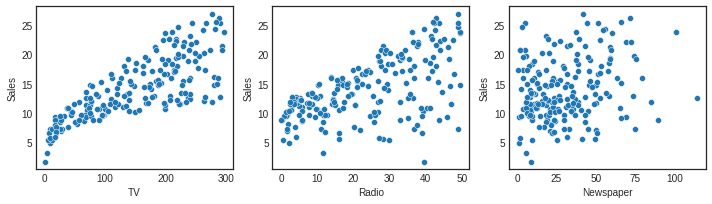

In [4]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (12, 3))
sns.scatterplot(x='TV', y='Sales',data=advertising,ax=ax1)
sns.scatterplot(x='Radio', y='Sales',data=advertising,ax=ax2)
sns.scatterplot(x='Newspaper', y='Sales',data=advertising,ax=ax3)
plt.show()


## Regresión y ajuste de modelos


El análisis de regresión consiste en encontrar un  **modelo** que relaciona los valores medidos de una variable **objetivo** (tb se llama la **respuesta**) en función de un conjunto de variables **explicativas** (tb **variables predictoras**, o **regresores**).

Los valores medidos en el mundo real nunca se ajustan de forma perfecta a un modelo, debido en primer lugar a errores de medida, pero también a que cualquier modelo matemático es una *simplificación* del mundo real, y si tuviera en cuenta todos los factores que influyen en un conjunto de variables, sería inmanejable.

Por tanto, no tiene sentido aspirar a encontrar un modelo que prediga exactamente los valores medidos, y debemos admitir que el modelo cometerá un cierto error.

Un modelo útil encuentra una relación funcional sencilla en conjuntos de pocas variables. Se trata de explicar una variable objetivo en función de otro conjunto de variables mejor conocidas o más fáciles de medir. El  **análisis de regresión**  (más exactamente, el análisis de regresión  *paramétrico*) permite encontrar un modelo explicativo en dos etapas:


 1. Nuestro conocimiento del tema en cuestión nos permite escribir un modelo que afirma que la variable  $Y$  es una función de las variables $X_1,\dots,X_p$ que podemos conocer, y de otras variables $\varepsilon_1,\dots,\varepsilon_k$ que no conocemos. La variable  $Y$ se suele llamar la **respuesta** y las variables  $X_1,\dots,X_p$ se llaman  **variables predictoras**:

$$
Y = f(X_1,\dots,X_p, \varepsilon_1,\dots,\varepsilon_k)
$$
 
 Sin embargo, no conocemos a priori la expresión de la función. En la **regresión paramétrica**, la función depende de unos pocos  **parámetros**  libres.


## Regresión Lineal Simple

Ajustamos un modelo lineal entre dos variables:

$$
Ventas = \beta_0 + \beta_1 \times TV + \varepsilon \thickapprox \beta_0 + \beta_1 \times TV
$$

Cada par de valores $(\beta_0, \beta_1)$ corresponde a una recta distinta.

### Ajuste por minímos cuadrados
Como podemos ver nuestra recta de ajuste quedará definida cuando obtengamos $\beta_0$ y $\beta_1$, es decir tenemos los siguientes datos:

Dibujamos la recta ajustada por mínimos cuadrados:
$$(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$$
El residuo en cada punto $e_i$ representaría la distancia del punto a la recta estimadada 
$$e_i=y_i-\beta_0 - \beta_1 \times x_i$$
Donde la suma de los residuos $RSS$ quedaría como:
$$ RSS=e^2_1+e^2_2+...+e^2_n = (y_1-\beta_0 - \beta_1 \times x_1)^2+...+(y_n-\beta_0 - \beta_1 \times x_n)^2$$
Si minimizamos $RSS$ obtenemos que:
$$\beta_1 = \frac{\sum_{i=1}^{n}(x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^{n}(x_i-\overline{x})^2}
\newline
\beta_0 = \overline{y}-\beta_1 \overline{x} $$
donde $\overline{x}$ representa la media $\overline{x}=\frac{1}{n}\sum_{i=1}^{n}x_i$

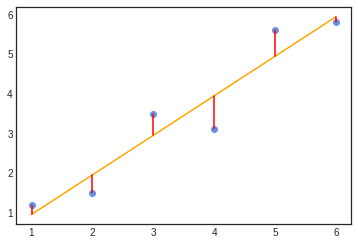

y = ( 0.9971428571428573 )* x +( -0.040000000000000924 )


In [5]:
def ajuste_minimos_cuadrados(x,y):
    b1=0
    b1_n=0
    b1_d=0
    for i in range(len(x)):
        b1_n = b1_n + (x[i]- np.mean(x))*(y[i]- np.mean(y))
        b1_d = b1_d + (x[i]-np.mean(x))**2
    b1=b1_n/b1_d
    b0=np.mean(y)-b1*np.mean(x)
    return b1,b0


x1 = np.array([1.0,2.0,3.0,4.0,5.0,6.0])
y1 = np.array([1.2,1.5,3.5,3.1,5.6,5.8])
#pintamos los puntos
plt.plot(x1, y1, 'o',color="cornflowerblue")

b1,b0 = ajuste_minimos_cuadrados(x1,y1)
#pintamos la recta
plt.plot(x1, b1*x1 + b0,color='orange')

#pintamos los residuos
for i in range(len(x1)):
    aux_x1=np.array([x1[i],x1[i]])
    aux_y1=np.array([y1[i],b1*x1[i]+(b0)])
    plt.plot(aux_x1,aux_y1,color="r")

    
plt.show()
print("y = (",b1,')* x +(',b0,')')

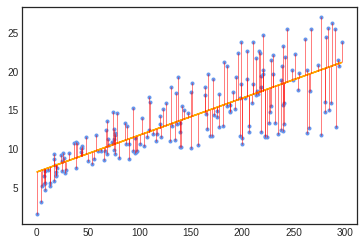

y = ( 0.04753664043301969 )* x +( 7.032593549127704 )


In [6]:
#Cargamos los datos definidos en advertising.csv
x = np.array(advertising.TV) #np.array(advertising['TV'])
y = np.array(advertising.Sales)
plt.plot(x, y, 'o',color="cornflowerblue", markersize=3)
b1,b0 = ajuste_minimos_cuadrados(x,y)
plt.plot(x, b1*x + b0,color='orange')
for i in range(len(x)):
    aux_x=np.array([x[i],x[i]])
    aux_y=np.array([y[i],b1*x[i]+(b0)])
    plt.plot(aux_x,aux_y,color="r",linewidth=0.5)

    
plt.show()
print("y = (",b1,')* x +(',b0,')')

Numpy nos proprociona pylyfit para hacer ajuntes polinomiales, utilizandola obenemos:

y = ( 0.9971428571428571 )* x +( -0.039999999999998 )


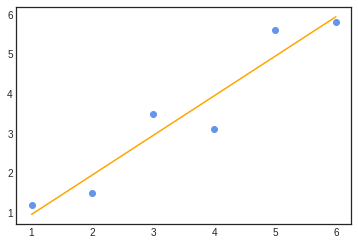

In [7]:
plt.plot(x1, y1, 'o',color="cornflowerblue")
b1, b0 = np.polyfit(x1, y1, 1) #ajustamos a polinomio de orden 1
plt.plot(x1, b1*x1 + b0,color='orange')
print("y = (",b1,')* x +(',b0,')')

Si queremos hacer una recresión no lineal, podemos utilizar polinomios de orden > 1.

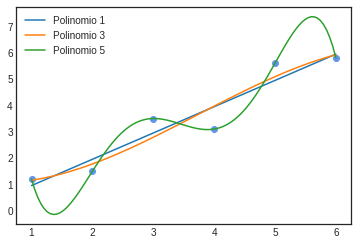

In [8]:
plt.plot(x1, y1, 'o',color="cornflowerblue")
xfit=np.linspace(x1[0],x1[len(x1)-1],100)
for o in range(1,6,2):
    b = np.polyfit(x1, y1, o)
    yfit = np.zeros(len(xfit))
    for i in range(len(xfit)):
        yfit[i]=0.0
        for j in range(len(b)):
            yfit[i]=yfit[i]+b[len(b)-j-1]*xfit[i]**j
    plt.plot(xfit, yfit,label="Polinomio "+str(o))
    
plt.legend()
plt.show()

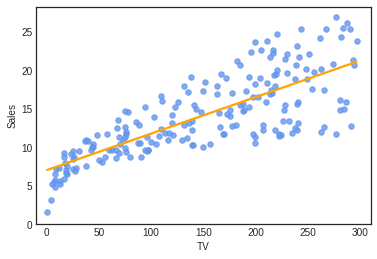

In [9]:
#seaborn
sns.regplot(x=advertising.TV, y=advertising.Sales, order=1, ci=None, scatter_kws={'color':'cornflowerblue', 's':30},color='orange')
# ajusta aun polinómio de orden = order, para ello usa numpy.polyfit
plt.xlim(-10,310)
plt.ylim(ymin=0)
plt.show()

### scikit_learn

La librería ``scikit_learn`` es una elección popular que cubre muchos algoritmos de estadística y machine learning.
El funcionamiento de la regresión lineal es similar al de otros modelos más sofisticados:

  - 1: Definimos un objeto de tipo "LinearRegression"

```python
regr = skl_lm.LinearRegression()
```

  - 2: El método ``fit`` **"ajusta"** la recta, encontrando los valores de $(a,b)$ para los que el error cuadrático cometido es menor. Necesita dos argumentos:
      - Un **DataFrame** X con las variables predictoras. No acepta una serie, si sólo tenemos una variable predictora usamos un DataFrame con una sóla columna.
      - Una **Serie** y con la variable objetivo.

También admite arrays de numpy.

```python
X = advertising[['TV']]
y = advertising.Sales

regr.fit(X,y)
```

y ya tenemos el objeto ``regr`` que contiene la recta ajustada por mínimos cuadrados.

In [10]:
# Usamos la librería scikit_learn
regr = skl_lm.LinearRegression()

X = advertising[['TV']]
y = advertising.Sales

regr.fit(X,y)

#El objeto regr contiene los valores de los parametros
#a,b donde y = b1*x + b0
print("y = ",regr.coef_[0],'* x +',regr.intercept_)

y =  0.04753664043301975 * x + 7.032593549127695


### Aplicar el modelo

Una vez hemos encontrado los valores de los coeficientes que mejor ajustan a los datos, podemos usar esos valores para predecir el nivel de ventas, para la inversión en TV que se ha planificado para el próximo periodo.

$$
Ventas\approx \beta_0 + \beta_1 \times TV
$$

Si usamos el modelo para predecir la respuesta ante valores de las variables predictoras que están fuera del rango de los datos de **entrenamiento** (los datos que usamos para hacer el ajuste), decimos que estamos **extrapolando**.

Con scikit-learn:

  - Podemos leer los coeficientes $(\beta_0, \beta_1)$

```python
print(regr.intercept_)  #beta0
print(regr.coef_)       #beta1
```

  - Podemos usar el modelo para predecir qué ocurrirá ante determinados valores de las variables regresoras.

```python
regr.predict([[200]])
```

In [11]:
#¿Qué ventas esperamos si la inversión en TV es de 200?
print(regr.predict([[200]]))

#¿Podemos pasar varios valores a la vez, pero tiene que
#ser un array con shape L x 1
xs = np.array([[200], [300]])
print(regr.predict(xs))

[16.53992164]
[16.53992164 21.29358568]


In [12]:
# Suele ser útil introducir los datos como un DataFrame
X = pd.DataFrame({
    'TV': [200,300]
})

regr.predict(X)

array([16.53992164, 21.29358568])

In [13]:
#Otra notación alternativa para definir un DataFrame
X = pd.DataFrame(
    [
        [200], [300]    
    ],
    columns=['TV']
)

regr.predict(X)

array([16.53992164, 21.29358568])

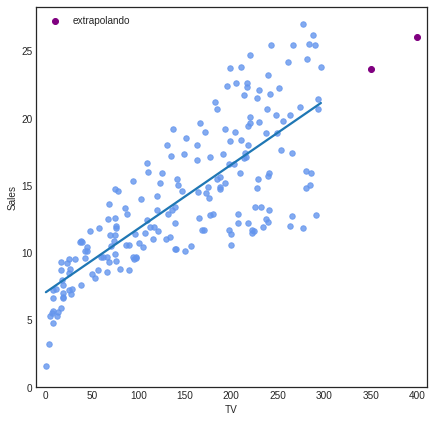

In [14]:
plt.figure(figsize=(7,7))
sns.regplot(x=advertising.TV, y=advertising.Sales, order=1, ci=None,  scatter_kws={'color':'cornflowerblue', 's':30})
xs = np.array([[350], [400]])
plt.scatter(xs, regr.predict(xs), color='purple', label='extrapolando')
plt.xlim(-10,410)
plt.ylim(ymin=0)
plt.legend(loc='upper left')
plt.show()

In [15]:
X = advertising[['TV']]
y = advertising.Sales

regr.score(X,y) #R²

0.611875050850071

## ¿Cómo decidimos si un modelo es bueno?

Supongamos que el mejor modelo lineal que hemos encontrado es $y=f(x)= \beta_0 + \beta_1 x $:

 - **TSS**: Total sum of squares: $\Sigma_i (y_i-\bar{y})^2$ (sumamos el cuadrado de la diferencia entre el dato $y_i$ y la media $\bar{y}$)
 - **RSS**: Residual sum of squares:  $\Sigma_i (y_i-f(x_i))^2$ (sumamos el cuadrado de la diferencia entre el dato $y_i$ y la predicción $f(x_i)$ usando nuestro modelo)
 - **RSS/TSS**: cociente entre la "varianza residual" y la "varianza total"
 - **R-cuadrado**: "porcentaje de la varianza que el modelo explica". 
$$
R^2 = 1 - \frac{RSS}{TSS}
$$

```python
#Calcula R^2
regr.score(X,y)
```

El **"estadístico" $R^2$** sólo puede tomar valores entre 0 y 1:
   - Si vale 0, es que RSS=TSS, luego el modelo tiene el mismo error cuadrático total que tomar $f(x)=\bar{y}$.
   - Si vale 1, es que RSS=0, luego los datos se ajustan de forma "perfecta" al modelo.

> - *¿Cuándo ocurre RSS=1?*

Cuando $y_i=f(x_i) = \beta_0 + x_i\beta_1$ para cada $i$. Es decir, *cuando hay una relación lineal entre el vector $x_i$ y el vector $y_i$*. Pero sabemos que hay una relación lineal entre dos series de puntos si y sólo la correlación es 1 o -1. De hecho, *para regresión lineal simple*, $R^2$ es *exactamente* la correlación al cuadrado.

Sin embargo, veremos que para regresión lineal múltiple, el estadístico $R^2$ ofrece información que las correlaciones no aportan.

### Statsmodels 

Vamos a usar también la librería statsmodel, que imita la sintaxis de la regresión lineal en ``R``.

La fórmula ``Sales ~ TV`` significa que busca la recta de regresión
$$
Sales\approx \beta_0 + \beta_1\times TV + \varepsilon
$$

 - Ajustamos el modelo $Sales\approx \beta_0 + \beta_1\times TV + \varepsilon$ usando el DataFrame ``advertising``.
 
```python
recta = smf.ols('Sales ~ TV', advertising).fit()
```

In [16]:
#Ajustamos el modelo $Sales\approx a *TV + b +\varepsilon$ usando el DataFrame ``advertising``
recta = smf.ols('Sales ~ TV', advertising).fit()

 - Para predecir las ventas para uno o varios valores de inversión en TV, es necesario preparar un DataFrame que tenga una serie de datos de nombre 'TV':

```python
nuevos_datos = pd.DataFrame({
    'TV': [TV_1, ..., TV_n ]
})
recta.predict(nuevos_datos)
```

In [17]:
nuevos_datos = pd.DataFrame({
    'TV': [100,150,200,250,300,350]
})
recta.predict(nuevos_datos)

0    11.786258
1    14.163090
2    16.539922
3    18.916754
4    21.293586
5    23.670418
dtype: float64

In [18]:
recta.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [19]:
recta.rsquared

0.611875050850071

#### Información extra sobre los coeficientes

stasmodels ofrece información extra sobre el resultado de la regresión.

In [20]:
recta.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


La primera fila contiene información sobre $a$ (**intercept**) y la segunda sobre $b$:
 - **coef** es la estimación del parámetro por mínimos cuadrados
 - **std err** es una medida de la incertidumbre en la estimación del parámetro
 - Las columnas **[0.025** y **0.975]** son los extremos de un "intervalo de confianza al 95%" para el valor del parámetro.
 - **t** es el valor del "t-statistic": si es bajo, quiere decir que la variable TV realmente no es de gran ayuda para predecir las ventas.
 - **P>|t|** es el *"p-valor"* asociado al valor anterior del t-estadístico. Toma valores entre 0 y 1. Un valor cercano a 1 se interpreta como *"se puede defender que Sales no depende de TV"*, y un valor cercano a 0 viene a ser *"realmente parece que TV es un buen predictor del valor de Sales"*. Un valor típico para comparar es p=0.05 o p=0.01. En este caso es aún menor.

Por favor leed las lecturas recomendadas (por ejemplo, la sección 3.1 del Introduction to Statistical Learning) para profundizar sobre estos números. La semana que viene hablaremos de ellos más despacio.